In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels
import statsmodels.tsa.api as tsa
import scipy

In [2]:
os.getcwd()

'/Users/ccm/Desktop/CUQTS/Reserch Idea/FX Parity/CUQTS_FXParity-main'

In [3]:
#Target Data Folder
PPP_Folder = '/Users/ccm/Desktop/CUQTS/Reserch Idea/FX Parity/CUQTS_FXParity-main/Result/PPP'
IRP_Folder = '/Users/ccm/Desktop/CUQTS/Reserch Idea/FX Parity/CUQTS_FXParity-main/Result/IRP'

In [4]:
df = pd.read_csv(PPP_Folder + '/Aggregated Result' + '/agg_error_pct_mean.csv', index_col = 0)
possible_curr_pairs_PPP = df.columns
df = pd.read_csv(IRP_Folder + '/Aggregated Result' + '/agg_error_pct_mean.csv', index_col = 0)
possible_curr_pairs_IRP = df.columns

if (len(possible_curr_pairs_PPP) != len(possible_curr_pairs_IRP)):
    print('error')
    

In [5]:
Maturity = ['1M', '3M', '6M', '1Y']
possible_curr_pairs = possible_curr_pairs_IRP

# (1) Error Pct Distribution

## (1.1) Aggregated : Error Pct Point

In [6]:
###Function for Computing Aggregated Error Pct Distribution (by data point in each pairs)
def aggregated_dist_error_pct_pt(data_folder):
    mean_ls = []
    std_ls = []
    skew_ls = []
    sample_size_ls = []
    for maturity in Maturity:
        data_ls = []
        for curr_pair in possible_curr_pairs:
            data_path = data_folder + '/' + curr_pair + '/Data Details' + '/' + maturity + '.csv'
            if not os.path.exists(data_path):
                continue
            df = pd.read_csv(data_path)
            if sum(df['spot_error_pct'].isna()) >0 :
                print(curr_pair)
            [data_ls.append(data) for data in df['spot_error_pct']]
        plt.hist(data_ls, bins = 100)
        plt.title(maturity)
        plt.savefig(data_folder + '/Data Analysis/Error_Pct_Distribution/' + 'aggregated_dist_error_pct_pt'+'_'+maturity+'.png')
        plt.show()
        
        mean_ls.append(np.mean(data_ls))
        std_ls.append(np.std(data_ls))
        skew_ls.append(scipy.stats.skew(data_ls))
        sample_size_ls.append(len(data_ls))
        
    stat_df = pd.DataFrame()
    stat_df['mean'] = mean_ls
    stat_df['std'] = std_ls
    stat_df['skew'] = skew_ls
    stat_df['sample size'] = sample_size_ls
    stat_df.index = Maturity
    
    return stat_df

PPP Result


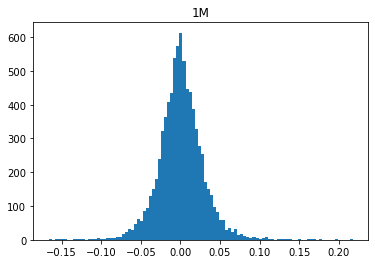

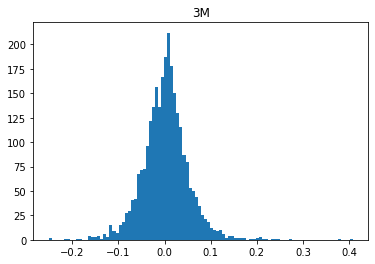

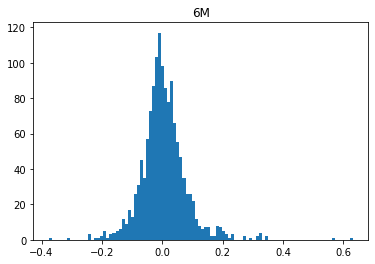

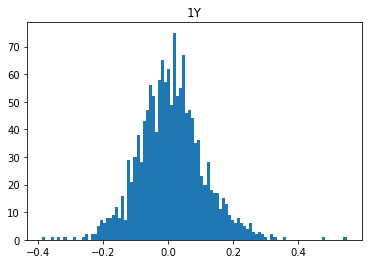

IRP Result


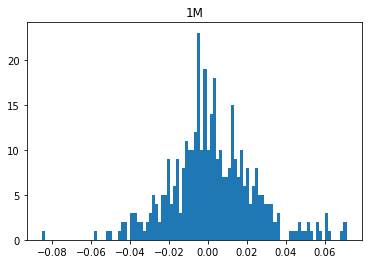

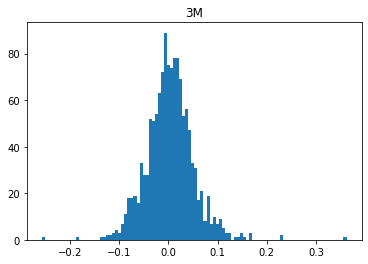

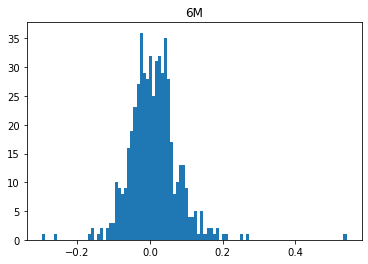

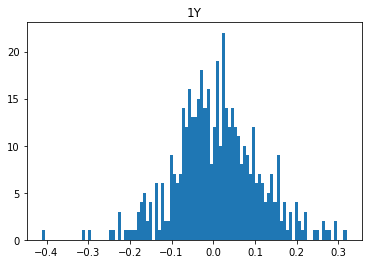

In [7]:
#Result

if not os.path.exists(PPP_Folder + '/Data Analysis/Error_Pct_Distribution'):
    os.mkdir(PPP_Folder + '/Data Analysis/Error_Pct_Distribution')
    
if not os.path.exists(IRP_Folder + '/Data Analysis/Error_Pct_Distribution'):
    os.mkdir(IRP_Folder + '/Data Analysis/Error_Pct_Distribution')

print('PPP Result')
PPP_stat_df = aggregated_dist_error_pct_pt(PPP_Folder)
PPP_stat_df.to_csv(PPP_Folder + '/Data Analysis/Error_Pct_Distribution/error_pt_mean_std.csv')
print('IRP Result')
IRP_stat_df = aggregated_dist_error_pct_pt(IRP_Folder)
IRP_stat_df.to_csv(IRP_Folder + '/Data Analysis/Error_Pct_Distribution/error_pt_mean_std.csv')

In [8]:
print(PPP_stat_df)
print(IRP_stat_df)

        mean       std      skew  sample size
1M  0.000640  0.028461  0.266832         8100
3M  0.002082  0.050761  0.491237         2721
6M  0.004482  0.076474  1.125010         1371
1Y  0.009501  0.099367  0.280268         1459
        mean       std      skew  sample size
1M  0.002393  0.021995  0.207876          383
3M  0.003648  0.047402  0.447258         1292
6M  0.010422  0.066983  0.954408          544
1Y  0.008981  0.101441 -0.029589          464


In [14]:
#Hypothes Testing on Error Pct Mean
# PPP Distribution
significant_lv = 0.05
print('PPP Hypothesis Testing')
for maturity in Maturity:
    mean = PPP_stat_df.loc[maturity]['mean']
    std = PPP_stat_df.loc[maturity]['std']
    p_value = 1 - scipy.stats.norm.cdf(mean/std)
    print(p_value)
    if p_value > significant_lv : 
        print(maturity, '_accepted')
    else:
        print(maturity, '_rejected')
        
# IRP Distribution
significant_lv = 0.05
print('PPP Hypothesis Testing')
for maturity in Maturity:
    mean = IRP_stat_df.loc[maturity]['mean']
    std = IRP_stat_df.loc[maturity]['std']
    p_value = 1 - scipy.stats.norm.cdf(mean/std)
    print(p_value)
    if p_value > significant_lv : 
        print(maturity, '_accepted')
    else:
        print(maturity, '_rejected')

PPP Hypothesis Testing
0.49102432579839483
1M _accepted
0.4836411324129162
3M _accepted
0.4766333974952639
6M _accepted
0.46191316432446394
1Y _accepted
PPP Hypothesis Testing
0.4566753664946507
1M _accepted
0.46932677208915363
3M _accepted
0.43817772255105947
6M _accepted
0.464726468226905
1Y _accepted


In [9]:
PPP_stat_df.loc['1M']['mean']

0.0006403967858426155

## (1.2) Aggregated : Error Pct Mean

In [105]:
###Function for Computing Aggregated Error Pct Distribution (by mean in each pairs)
def aggregated_dist_error_pct_mean(data_folder):
    mean_ls = []
    std_ls = []
    skew_ls = []
    sample_size_ls = []
    
    df = pd.read_csv(data_folder + '/Aggregated Result/' + 'agg_error_pct_mean.csv', index_col = 0)
    
    for maturity in Maturity:
        
        data_ls = df.loc[maturity].dropna()
        
        plt.hist(data_ls, bins = 10)
        plt.title(maturity)
        plt.savefig(data_folder + '/Data Analysis/Error_Pct_Distribution/' + 'aggregated_dist_error_pct_mean'+'_'+maturity+'.png')
        plt.show()
        
        mean_ls.append(np.mean(data_ls))
        std_ls.append(np.std(data_ls))
        skew_ls.append(scipy.stats.skew(data_ls))
        sample_size_ls.append(len(data_ls))
        
    stat_df = pd.DataFrame()
    stat_df['mean'] = mean_ls
    stat_df['std'] = std_ls
    stat_df['skew'] = skew_ls
    stat_df['sample size'] = sample_size_ls
    stat_df.index = Maturity
    
    return stat_df

PPP Result


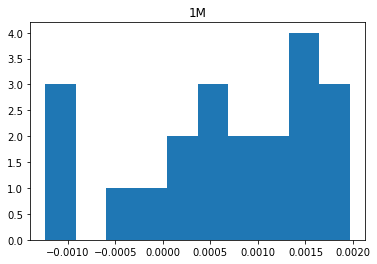

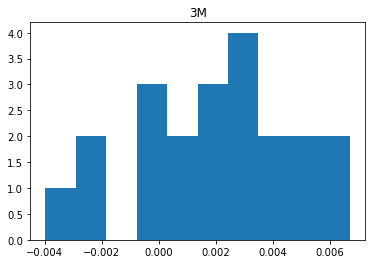

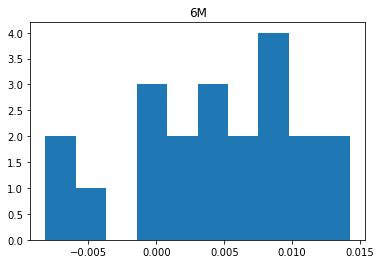

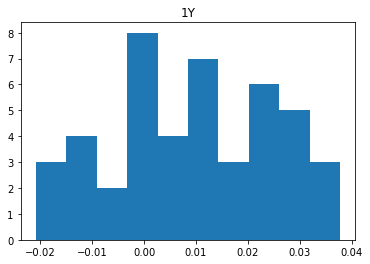

IRP Result


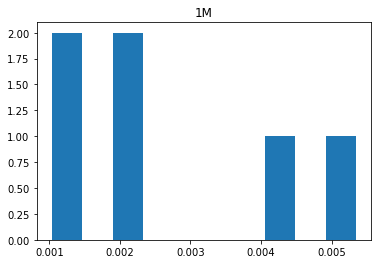

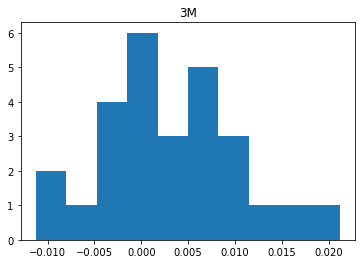

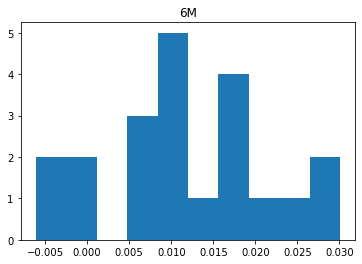

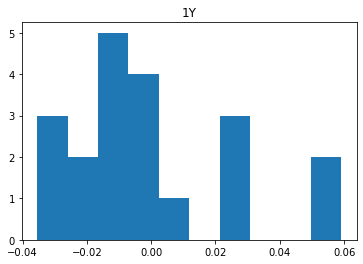

In [106]:
print('PPP Result')
PPP_stat_df = aggregated_dist_error_pct_mean(PPP_Folder)
PPP_stat_df.to_csv(PPP_Folder + '/Data Analysis/Error_Pct_Distribution/error_mean_mean_std.csv')
print('IRP Result')
IRP_stat_df = aggregated_dist_error_pct_mean(IRP_Folder)
IRP_stat_df.to_csv(IRP_Folder + '/Data Analysis/Error_Pct_Distribution/error_mean_mean_std.csv')

In [107]:
print(PPP_stat_df)
print(IRP_stat_df)

        mean       std  sample size
1M  0.000621  0.000965           21
3M  0.002017  0.002931           21
6M  0.004339  0.006136           21
1Y  0.009211  0.015666           45
        mean       std  sample size
1M  0.002734  0.001606            6
3M  0.003075  0.007290           27
6M  0.011657  0.009550           21
1Y -0.000166  0.026211           20


## (1.2) By country : Error Pct Mean & Std

In [7]:
for data_folder in [PPP_Folder, IRP_Folder]:
    
    top_mean_df = pd.DataFrame()
    bottom_mean_df = pd.DataFrame()
    
    top_std_df = pd.DataFrame()
    bottom_std_df = pd.DataFrame()
    
    mean_df = pd.read_csv(data_folder + '/Aggregated Result/' + 'agg_error_pct_mean.csv', index_col = 0)
    mean_df = mean_df.T
    std_df = pd.read_csv(data_folder + '/Aggregated Result/' + 'agg_error_pct_var.csv', index_col = 0)
    std_df = np.sqrt(std_df.T)
    
    for maturity in Maturity:
        
        #Finding Top/Bottom 5 pairs in turns of error pct mean
        
        top_mean_pair = mean_df[maturity].dropna().sort_values(ascending = False).head().index
        
        top_mean_df[maturity] = top_mean_pair
        top_mean_df[maturity + '_mean'] = mean_df.loc[top_mean_pair][maturity].values
        top_mean_df[maturity + '_std'] = std_df.loc[top_mean_pair][maturity].values
        
        bottom_mean_pair = mean_df[maturity].dropna().sort_values(ascending = True).head().index
        
        bottom_mean_df[maturity] = bottom_mean_pair
        bottom_mean_df[maturity + '_mean'] = mean_df.loc[bottom_mean_pair][maturity].values
        bottom_mean_df[maturity + '_std'] = std_df.loc[bottom_mean_pair][maturity].values
        
        #Finding Top/Bottom 5 pairs in turns of error pct mean
        
        top_std_pair = std_df[maturity].dropna().sort_values(ascending = False).head().index
        
        top_std_df[maturity] = top_std_pair
        top_std_df[maturity + '_mean'] = mean_df.loc[top_std_pair][maturity].values
        top_std_df[maturity + '_std'] = std_df.loc[top_std_pair][maturity].values
        
        bottom_std_pair = std_df[maturity].dropna().sort_values(ascending = True).head().index
        
        bottom_std_df[maturity] = bottom_std_pair
        bottom_std_df[maturity + '_mean'] = mean_df.loc[bottom_std_pair][maturity].values
        bottom_std_df[maturity + '_std'] = std_df.loc[bottom_std_pair][maturity].values
        
    print(data_folder[-3:])
    print('highest mean')
    print(top_mean_df)
    print('lowest mean')
    print(bottom_mean_df)
    
    print('highest std')
    print(top_std_df)
    print('lowest std')
    print(bottom_std_df)
    
    top_mean_df.to_csv(data_folder + '/Data Analysis/Error_Pct_Distribution/highest_mean_by_countries.csv')
    bottom_mean_df.to_csv(data_folder + '/Data Analysis/Error_Pct_Distribution/lowest_mean_by_countries.csv')
    top_std_df.to_csv(data_folder + '/Data Analysis/Error_Pct_Distribution/highest_std_by_countries.csv')
    bottom_std_df.to_csv(data_folder + '/Data Analysis/Error_Pct_Distribution/lowest_std_by_countries.csv')
    

PPP
highest mean
       1M   1M_mean    1M_std      3M   3M_mean    3M_std      6M   6M_mean  \
0  USDSEK  0.001966  0.032812  USDSEK  0.006694  0.057728  USDSEK  0.014235   
1  USDNOK  0.001945  0.031619  USDJPY  0.006218  0.058139  USDJPY  0.013226   
2  USDJPY  0.001902  0.029821  USDNOK  0.005274  0.056604  GBPJPY  0.011746   
3  USDEUR  0.001521  0.027714  GBPJPY  0.005156  0.064616  USDNOK  0.010901   
4  GBPJPY  0.001512  0.034949  USDEUR  0.004536  0.049659  USDEUR  0.009022   

     6M_std      1Y   1Y_mean    1Y_std  
0  0.088753  NZDCAD  0.037763  0.084575  
1  0.084089  AUDCAD  0.034823  0.075266  
2  0.103062  NZDJPY  0.034322  0.135624  
3  0.080627  AUDJPY  0.031202  0.127249  
4  0.072343  USDCAD  0.030434  0.082450  
lowest mean
       1M   1M_mean    1M_std      3M   3M_mean    3M_std      6M   6M_mean  \
0  NOKCHF -0.001234  0.024468  SEKCHF -0.003975  0.039390  SEKCHF -0.008156   
1  SEKCHF -0.001075  0.024586  JPYCHF -0.002836  0.055611  NOKCHF -0.005971   
2  JPYC

In [78]:
mean_df.loc[bottom_mean_pair][maturity]

GBPCAD   -0.018800
GBPAUD   -0.023061
EURAUD   -0.026547
GBPNZD   -0.034924
JPYCHF   -0.035492
Name: 1Y, dtype: float64

# (2) Time Effect on Error Pct

In [17]:
time_unit_conversion = {'1M' : 1, '3M' : 3, '6M' : 6, '1Y' : 12}

if not os.path.exists(PPP_Folder + '/Data Analysis/Time Effect'):
    os.mkdir(PPP_Folder + '/Data Analysis/Time Effect')
    
if not os.path.exists(IRP_Folder + '/Data Analysis/Time Effect'):
    os.mkdir(IRP_Folder + '/Data Analysis/Time Effect')

In [46]:
#Defining function to study time effect on Error Pct Point (aggregated sense)

def aggregated_time_effects_error_pct_pt(data_folder, version):
    error_pct_point_ls = []
    time_frame_ls = []
    
    df = pd.read_csv(data_folder + '/Aggregated Result/' + 'agg_error_pct_mean.csv', index_col = 0)
    
    for maturity in Maturity:
        for curr_pair in possible_curr_pairs:
            data_path = data_folder + '/' + curr_pair + '/Data Details' + '/' + maturity + '.csv'
            if not os.path.exists(data_path):
                continue
            df = pd.read_csv(data_path)
            
            if sum(df['spot_error_pct'].isna()) >0 :
                print(curr_pair)
                
            for data in df['spot_error_pct']:
                if version == 'non-abs':
                    error_pct_point_ls.append(data)
                else:
                    error_pct_point_ls.append(np.abs(data))
                time_frame_ls.append(time_unit_conversion[maturity])
                
    print('data length', len(error_pct_point_ls))
    plt.scatter(time_frame_ls, error_pct_point_ls)
    plt.xlabel('numbers of months')
    plt.ylabel(version + '_deviation')
    plt.title('Time Effect')
    plt.savefig(data_folder + '/Data Analysis/Time Effect/' + 'aggregated_time_effect_error_pt_'+version+'.png')
    plt.show()
    
    corr = np.corrcoef(time_frame_ls, error_pct_point_ls)[1,0]
    
    return corr

In [19]:
#Defining function to study time effect on Error Pct mean (aggregated sense)

def aggregated_time_effects_error_pct_mean(data_folder, version):
    
    error_pct_mean_ls = []
    time_frame_ls = []
    
    df = pd.read_csv(data_folder + '/Aggregated Result/' + 'agg_error_pct_mean.csv', index_col = 0)
    
    for maturity in Maturity:
        
        data_ls = df.loc[maturity].dropna().values
        
        for data in data_ls:
            
            if version == 'non-abs':
                error_pct_mean_ls.append(data)
            else:
                error_pct_mean_ls.append(np.abs(data))
            
            time_frame_ls.append(time_unit_conversion[maturity])
                
    print('data length', len(error_pct_mean_ls))
    plt.scatter(time_frame_ls, error_pct_mean_ls)
    plt.title('Time Effect')
    plt.xlabel('numbers of months')
    plt.ylabel(version+ '_deviation')
    plt.savefig(data_folder + '/Data Analysis/Time Effect/' + 'aggregated_time_effect_error_mean_'+version+'.png')
    plt.show()
    
    corr = np.corrcoef(time_frame_ls, error_pct_mean_ls)[1,0]
    
    return corr

In [20]:
# Defining a function to study time effects on error pct pt/mean country by country

def by_country_time_effects_error_pct_pt(data_folder, version, sample_size):
    correlation_ls = []
    curr_pair_ls = []
    
    for curr_pair in possible_curr_pairs:
        
        curr_pair_folder = data_folder + '/' + curr_pair + '/Data Details'
            
        error_pct_point_ls = []
        time_frame_ls = []
        
        for maturity in Maturity:
            
            try:
                df = pd.read_csv(curr_pair_folder + '/' + maturity + '.csv')
            except:
                continue
                
            for i in range(sample_size, len(df['spot_error_pct']), sample_size):
                
                data = np.mean(df['spot_error_pct'][i - sample_size : i])
                
                if version == 'non-abs':
                    error_pct_point_ls.append(data)
                else:
                    error_pct_point_ls.append(np.abs(data))
                    
                time_frame_ls.append(time_unit_conversion[maturity])
                
            
                
        curr_pair_ls.append(curr_pair)
        correlation_ls.append(np.corrcoef(time_frame_ls, error_pct_point_ls)[1,0])
        
    result_df = pd.DataFrame()
    result_df['corr'] = correlation_ls
    result_df.index = curr_pair_ls
    
    result_df.to_csv(data_folder + '/Data Analysis/Time Effect/By Country/by_country_error_pct_corr_'+ version+ '_size_' + str(sample_size) +'.csv')
    return result_df

In [21]:
# Defining a function to sort out those countries with largest/smallest time effects on error pct

def sort_country_by_time_effects_on_error_pct(data_folder, sample_size):
    
    top_non_abs_df = pd.DataFrame()
    bottom_non_abs_df = pd.DataFrame()
    
    top_abs_df = pd.DataFrame()
    bottom_abs_df = pd.DataFrame()
    
    non_abs_df = pd.read_csv(data_folder + '/Data Analysis/Time Effect/By Country/by_country_error_pct_corr_non-abs'+'_size_'+ str(sample_size) + '.csv', index_col = 0)
    abs_df = pd.read_csv(data_folder + '/Data Analysis/Time Effect/By Country/by_country_error_pct_corr_abs'+'_size_'+ str(sample_size) + '.csv', index_col = 0)

    #Finding Top/Bottom 5 pairs in turns of non-abs time correlation
        
    top_non_abs_pair = non_abs_df['corr'].dropna().sort_values(ascending = False).head().index
        
    top_non_abs_df['curr_pair'] = top_non_abs_pair
    top_non_abs_df['corr'] = non_abs_df.loc[top_non_abs_pair]['corr'].values
    
    bottom_non_abs_pair = non_abs_df['corr'].dropna().sort_values(ascending = True).head().index
        
    bottom_non_abs_df['curr_pair'] = bottom_non_abs_pair
    bottom_non_abs_df['corr'] = non_abs_df.loc[bottom_non_abs_pair]['corr'].values
        
    #Finding Top/Bottom 5 pairs in turns of abs time correlation
        
    top_abs_pair = abs_df['corr'].dropna().sort_values(ascending = False).head().index
        
    top_abs_df['curr_pair'] = top_abs_pair
    top_abs_df['corr'] = abs_df.loc[top_abs_pair]['corr'].values
    
    bottom_abs_pair = abs_df['corr'].dropna().sort_values(ascending = True).head().index
        
    bottom_abs_df['curr_pair'] = bottom_abs_pair
    bottom_abs_df['corr'] = abs_df.loc[bottom_abs_pair]['corr'].values
        
    print(data_folder[-3:])
    print('non_abs : highest corr')
    print(top_non_abs_df)
    print('non_abs : lowest corr')
    print(bottom_non_abs_df)
    
    print('abs : highest corr')
    print(top_abs_df)
    print('abs : lowest corr')
    print(bottom_abs_df)
    
    top_non_abs_df.to_csv(data_folder + '/Data Analysis/Time Effect/By Country/highest_non_abs_corr_by_countries_size_'+ str(sample_size) +'.csv')
    bottom_non_abs_df.to_csv(data_folder + '/Data Analysis/Time Effect/By Country/lowest_non_abs_corr_by_countries_size_'+ str(sample_size) +'.csv')
    top_abs_df.to_csv(data_folder + '/Data Analysis/Time Effect/By Country/highest_abs_corr_by_countries_size_'+ str(sample_size) +'.csv')
    bottom_abs_df.to_csv(data_folder + '/Data Analysis/Time Effect/By Country/lowest_abs_corr_by_countries_size_'+ str(sample_size) +'.csv')
    
    return top_non_abs_df, bottom_non_abs_df, top_abs_df, bottom_abs_df

## (2.1) Aggregated : Error Pct Point (or Abs) plot and correlation

PPP Result-non_abs
data length 13651


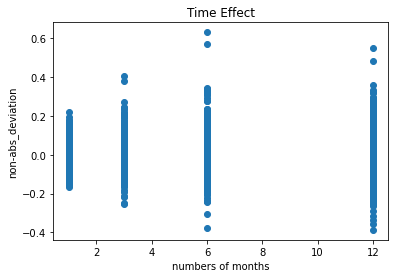

0.05380568905147343
IRP Result-non_abs
data length 2683


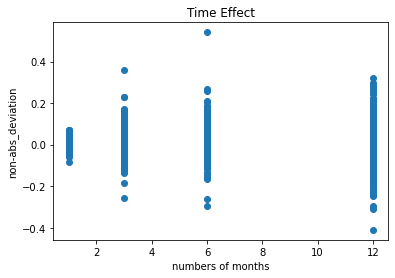

0.03953301143042811


In [47]:
#non absolute value 
print('PPP Result-non_abs')
PPP_corr = aggregated_time_effects_error_pct_pt(PPP_Folder, 'non-abs')
print(PPP_corr)

print('IRP Result-non_abs')
IRP_corr = aggregated_time_effects_error_pct_pt(IRP_Folder, 'non-abs')
print(IRP_corr)

PPP Result-abs
data length 13651


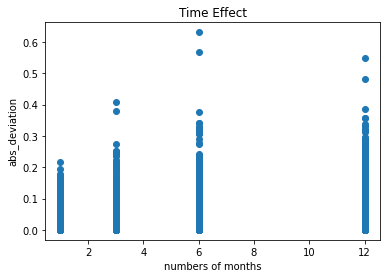

0.45577770048426447
IRP Result-abs
data length 2683


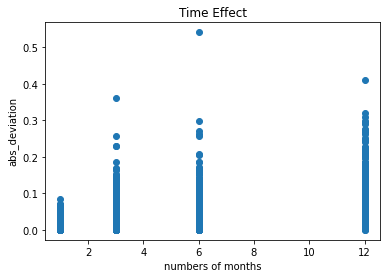

0.40862020893602025


In [50]:
#absolute value 
print('PPP Result-abs')
PPP_corr = aggregated_time_effects_error_pct_pt(PPP_Folder, 'abs')
print(PPP_corr)

print('IRP Result-abs')
IRP_corr = aggregated_time_effects_error_pct_pt(IRP_Folder, 'abs')
print(IRP_corr)

## (2.2) Aggregated : Error Pct Mean (or Abs) plot and correlation

PPP Result-non_abs
data length 108


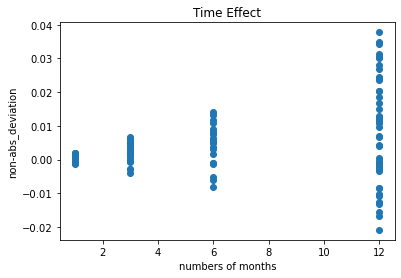

0.32195030631929267
IRP Result-non_abs
data length 74


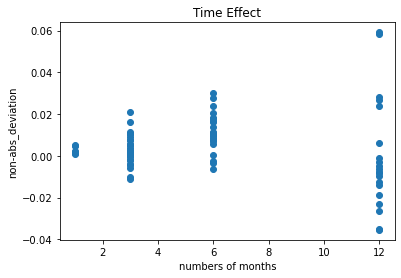

-0.0860974362066856


In [51]:
#non absolute value 
print('PPP Result-non_abs')
PPP_corr = aggregated_time_effects_error_pct_mean(PPP_Folder, 'non-abs')
print(PPP_corr)

print('IRP Result-non_abs')
IRP_corr = aggregated_time_effects_error_pct_mean(IRP_Folder, 'non-abs')
print(IRP_corr)

PPP Result-non_abs
data length 108


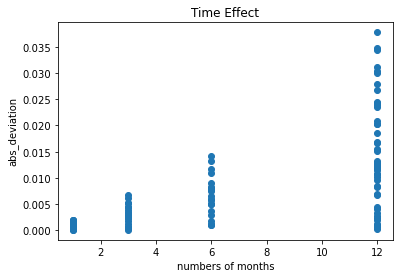

0.6493202897168243
IRP Result-non_abs
data length 74


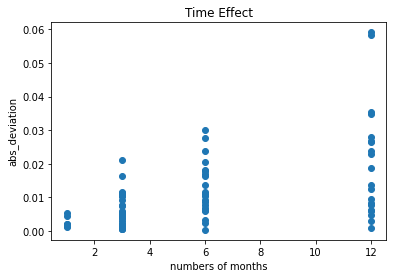

0.5222809906492976


In [52]:
#absolute value 
print('PPP Result-non_abs')
PPP_corr = aggregated_time_effects_error_pct_mean(PPP_Folder, 'abs')
print(PPP_corr)

print('IRP Result-non_abs')
IRP_corr = aggregated_time_effects_error_pct_mean(IRP_Folder, 'abs')
print(IRP_corr)

## (2.3) By country : Error Pct Point (or Abs) top/bottom 5 correlation

In [24]:
if not os.path.exists(PPP_Folder + '/Data Analysis/Time Effect/By Country'):
    os.mkdir(PPP_Folder + '/Data Analysis/Time Effect/By Country')
    
if not os.path.exists(IRP_Folder + '/Data Analysis/Time Effect/By Country'):
    os.mkdir(IRP_Folder + '/Data Analysis/Time Effect/By Country')

In [25]:
sample_size = 1

PPP_by_country_error_pct_pt_non_abs = by_country_time_effects_error_pct_pt(PPP_Folder, 'non-abs', sample_size)
    
PPP_by_country_error_pct_pt_abs = by_country_time_effects_error_pct_pt(PPP_Folder, 'abs', sample_size)
    
IRP_by_country_error_pct_pt_non_abs = by_country_time_effects_error_pct_pt(IRP_Folder, 'non-abs', sample_size)
    
IRP_by_country_error_pct_pt_abs = by_country_time_effects_error_pct_pt(IRP_Folder, 'abs', sample_size)

In [26]:
for data_folder in [PPP_Folder, IRP_Folder]:
    
    top_non_abs_df, bottom_non_abs_df, top_abs_df, bottom_abs_df = sort_country_by_time_effects_on_error_pct(data_folder, sample_size)
    
    print(data_folder[-3:])
    print('non_abs : highest corr')
    print(top_non_abs_df)
    print('non_abs : lowest corr')
    print(bottom_non_abs_df)
    
    print('abs : highest corr')
    print(top_abs_df)
    print('abs : lowest corr')
    print(bottom_abs_df)

PPP
non_abs : highest corr
  curr_pair      corr
0    USDSEK  0.109259
1    GBPSEK  0.095036
2    USDJPY  0.094785
3    USDEUR  0.089095
4    USDNOK  0.080723
non_abs : lowest corr
  curr_pair      corr
0    SEKCHF -0.096731
1    NOKCHF -0.055567
2    JPYCHF -0.044005
3    EURCHF -0.029722
4    GBPCHF -0.009860
abs : highest corr
  curr_pair      corr
0    USDEUR  0.533230
1    USDSEK  0.523293
2    GBPEUR  0.502186
3    NOKSEK  0.499310
4    GBPJPY  0.490987
abs : lowest corr
  curr_pair      corr
0    EURCHF  0.326122
1    JPYCHF  0.400328
2    JPYSEK  0.403519
3    USDGBP  0.417506
4    JPYNOK  0.418782
PPP
non_abs : highest corr
  curr_pair      corr
0    USDSEK  0.109259
1    GBPSEK  0.095036
2    USDJPY  0.094785
3    USDEUR  0.089095
4    USDNOK  0.080723
non_abs : lowest corr
  curr_pair      corr
0    SEKCHF -0.096731
1    NOKCHF -0.055567
2    JPYCHF -0.044005
3    EURCHF -0.029722
4    GBPCHF -0.009860
abs : highest corr
  curr_pair      corr
0    USDEUR  0.533230
1    USDSE

## (2.4) By country : Error Pct Mean (or Abs) top/bottom 5 correlation

In [28]:
sample_size = 5

PPP_by_country_error_pct_pt_non_abs = by_country_time_effects_error_pct_pt(PPP_Folder, 'non-abs', sample_size)
    
PPP_by_country_error_pct_pt_abs = by_country_time_effects_error_pct_pt(PPP_Folder, 'abs', sample_size)
    
IRP_by_country_error_pct_pt_non_abs = by_country_time_effects_error_pct_pt(IRP_Folder, 'non-abs', sample_size)
    
IRP_by_country_error_pct_pt_abs = by_country_time_effects_error_pct_pt(IRP_Folder, 'abs', sample_size)

In [29]:
for data_folder in [PPP_Folder, IRP_Folder]:
    
    top_non_abs_df, bottom_non_abs_df, top_abs_df, bottom_abs_df = sort_country_by_time_effects_on_error_pct(data_folder, sample_size)
    
    print(data_folder[-3:])
    print('non_abs : highest corr')
    print(top_non_abs_df)
    print('non_abs : lowest corr')
    print(bottom_non_abs_df)
    
    print('abs : highest corr')
    print(top_abs_df)
    print('abs : lowest corr')
    print(bottom_abs_df)

PPP
non_abs : highest corr
  curr_pair      corr
0    USDSEK  0.276143
1    GBPSEK  0.257180
2    USDNOK  0.228345
3    USDEUR  0.211985
4    NOKSEK  0.188104
non_abs : lowest corr
  curr_pair      corr
0    SEKCHF -0.259684
1    NOKCHF -0.173624
2    GBPEUR -0.079073
3    JPYCHF -0.069218
4    EURCHF -0.062200
abs : highest corr
  curr_pair      corr
0    EURJPY  0.561741
1    GBPJPY  0.522068
2    USDEUR  0.514343
3    JPYSEK  0.496836
4    USDJPY  0.492954
abs : lowest corr
  curr_pair      corr
0    EURCHF  0.295203
1    NOKSEK  0.313866
2    USDGBP  0.345556
3    EURSEK  0.363257
4    USDCHF  0.368512
PPP
non_abs : highest corr
  curr_pair      corr
0    USDSEK  0.276143
1    GBPSEK  0.257180
2    USDNOK  0.228345
3    USDEUR  0.211985
4    NOKSEK  0.188104
non_abs : lowest corr
  curr_pair      corr
0    SEKCHF -0.259684
1    NOKCHF -0.173624
2    GBPEUR -0.079073
3    JPYCHF -0.069218
4    EURCHF -0.062200
abs : highest corr
  curr_pair      corr
0    EURJPY  0.561741
1    GBPJP

# (3) Spread Effect on Error Pct

In [30]:
if not os.path.exists(PPP_Folder + '/Data Analysis/Spread Effect'):
    os.mkdir(PPP_Folder + '/Data Analysis/Spread Effect')
    
if not os.path.exists(IRP_Folder + '/Data Analysis/Spread Effect'):
    os.mkdir(IRP_Folder + '/Data Analysis/Spread Effect')

In [31]:
#Defining function to study spread effect on Error Pct Point (aggregated sense)

def aggregated_spread_effects_error_pct_pt(data_folder, version, sample_size):

    corr_ls = []
    
    for maturity in Maturity:
        
        error_pct_point_ls = []
        spread_ls = []
        
        for curr_pair in possible_curr_pairs:
            data_path = data_folder + '/' + curr_pair + '/Data Details' + '/' + maturity + '.csv'
            if not os.path.exists(data_path):
                continue
            df = pd.read_csv(data_path)
            
            if sum(df['spot_error_pct'].isna()) >0 :
                print(curr_pair)
                
            for i in range(sample_size, len(df), sample_size):
                if version == 'non-abs':
                    
                    error_pct_point_ls.append(np.mean(df['spot_error_pct'][i-sample_size : i]))
                    spread_ls.append(np.mean(df['spread'][i-sample_size : i]))
                else:
                    error_pct_point_ls.append(np.abs(np.mean(df['spot_error_pct'][i-sample_size : i])))
                    spread_ls.append(np.mean(np.abs(df['spread'][i-sample_size : i])))               
                
            
        print('data length', len(error_pct_point_ls))
        plt.scatter(spread_ls, error_pct_point_ls)
        plt.title('Spread Effect')
        plt.xlabel(version + '_spread')
        plt.ylabel(version + '_precentage_error')
        plt.savefig(data_folder + '/Data Analysis/Spread Effect/' + 'aggregated_spread_effect_error_pt_'+version +'_'+ maturity + '_size_' + str(sample_size) +'.png')
        plt.show()
        corr_ls.append(np.corrcoef(spread_ls, error_pct_point_ls)[1,0])
        
    corr_df = pd.DataFrame()
    corr_df['corr'] = corr_ls
    corr_df.index = Maturity
    
    corr_df.to_csv(data_folder + '/Data Analysis/Spread Effect/' + 'aggregated_spread_effect_error_pt_'+version + '_size_' + str(sample_size) +'.csv')
    
    return corr_df

In [32]:
#Defining function to study spread effect on Error Pct mean (aggregated sense)

def aggregated_spread_effects_error_pct_mean(data_folder, version):
    
    df = pd.read_csv(data_folder + '/Aggregated Result/' + 'agg_error_pct_mean.csv', index_col = 0)
    
    corr_ls = []
    
    for maturity in Maturity:
        
        error_pct_point_ls = []
        spread_ls = []
        
        for curr_pair in possible_curr_pairs:
            
            data_path = data_folder + '/' + curr_pair + '/Data Details' + '/' + maturity + '.csv'
            
            if not os.path.exists(data_path):
                continue
                
            df = pd.read_csv(data_path)
            
            if len(df) == 0:
                continue
            
            if sum(df['spot_error_pct'].isna()) >0 :
                print(curr_pair)
                
            if sum(df['spread'].isna()) >0 :
                print(curr_pair)
                

            if version == 'non-abs':
                error_pct_point_ls.append(np.mean(df['spot_error_pct'].dropna()))
                spread_ls.append(np.mean(df['spread'].dropna()))
            else:
                error_pct_point_ls.append(np.mean(np.abs(df['spot_error_pct'].dropna())))
                spread_ls.append(np.mean(np.abs(df['spread'].dropna())))
                           
        print('data length', len(error_pct_point_ls))
        plt.scatter(spread_ls, error_pct_point_ls)
        plt.xlabel(version + '_spread')
        plt.ylabel(version + '_precentage_error')
        plt.title('Spread Effect')
        plt.savefig(data_folder + '/Data Analysis/Spread Effect/' + 'aggregated_spread_effect_error_mean_'+version +'_'+ maturity +'.png')
        plt.show()
        
        corr_ls.append(np.corrcoef(spread_ls, error_pct_point_ls)[1,0])
        
    corr_df = pd.DataFrame()
    corr_df['corr'] = corr_ls
    corr_df.index = Maturity
    
    corr_df.to_csv(data_folder + '/Data Analysis/Spread Effect/' + 'aggregated_spread_effect_error_mean_'+version + '.csv')
    
    return corr_df

In [33]:
# Defining a function to study spread effects on error pct pt/mean country by country

def by_country_spread_effects_error_pct_pt(data_folder, version, sample_size):
    
    result_df = pd.DataFrame()
    result_df.index = Maturity
    
    for curr_pair in possible_curr_pairs:
        
        correlation_ls = []
        
        curr_pair_folder = data_folder + '/' + curr_pair + '/Data Details'
        
        for maturity in Maturity:
            
            error_pct_point_ls = []
            spread_ls = []
            
            try:
                df = pd.read_csv(curr_pair_folder + '/' + maturity + '.csv')
            except:
                correlation_ls.append(np.nan)
                continue
                
            if len(df) < 15:
                correlation_ls.append(np.nan)
                continue
                
            for i in range(sample_size, len(df), sample_size):
                
                if version == 'non-abs':
                    error_pct_point_ls.append(np.mean(df['spot_error_pct'][i - sample_size : i]))
                    spread_ls.append(np.mean(df['spread'][i - sample_size : i]))
                else:
                    error_pct_point_ls.append(np.mean(np.abs(df['spot_error_pct'][i - sample_size : i])))
                    spread_ls.append(np.mean(np.abs(df['spread'][i - sample_size : i])))
                
            correlation_ls.append(np.corrcoef(spread_ls, error_pct_point_ls)[1,0])
            
        result_df[curr_pair] = correlation_ls
    
    result_df = result_df.T
    
    result_df.to_csv(data_folder + '/Data Analysis/Spread Effect/By Country/by_country_error_pct_corr_'+ version+ '.csv')
    return result_df

In [34]:
# Defining a function to sort out those countries with largest/smallest time effects on error pct

def sort_country_by_spread_effects_on_error_pct(data_folder):
    
    top_non_abs_df = pd.DataFrame()
    bottom_non_abs_df = pd.DataFrame()
    
    top_abs_df = pd.DataFrame()
    bottom_abs_df = pd.DataFrame()
    
    non_abs_agg_df = pd.read_csv(data_folder + '/Data Analysis/Spread Effect/By Country/by_country_error_pct_corr_non-abs.csv', index_col = 0)
    abs_agg_df = pd.read_csv(data_folder + '/Data Analysis/Spread Effect/By Country/by_country_error_pct_corr_abs.csv', index_col = 0)
    
    for maturity in Maturity:
        
        non_abs_df = pd.DataFrame()
        non_abs_df['corr'] = non_abs_agg_df[maturity]
        non_abs_df.index = non_abs_agg_df.index
        
        abs_df = pd.DataFrame()
        abs_df['corr'] = abs_agg_df[maturity]
        abs_df.index = abs_agg_df.index
        
        
        #Finding Top/Bottom 5 pairs in turns of non-abs spread correlation
        
        top_non_abs_pair = non_abs_df['corr'].dropna().sort_values(ascending = False).head().index
        
        top_non_abs_df[maturity + 'curr_pair'] = top_non_abs_pair
        top_non_abs_df[maturity +'corr'] = non_abs_df.loc[top_non_abs_pair]['corr'].values
    
        bottom_non_abs_pair = non_abs_df['corr'].dropna().sort_values(ascending = True).head().index
        
        bottom_non_abs_df[maturity +'curr_pair'] = bottom_non_abs_pair
        bottom_non_abs_df[maturity +'corr'] = non_abs_df.loc[bottom_non_abs_pair]['corr'].values
        
        #Finding Top/Bottom 5 pairs in turns of abs spread correlation
        
        top_abs_pair = abs_df['corr'].dropna().sort_values(ascending = False).head().index
        
        top_abs_df[maturity +'curr_pair'] = top_abs_pair
        top_abs_df[maturity +'corr'] = abs_df.loc[top_abs_pair]['corr'].values
    
        bottom_abs_pair = abs_df['corr'].dropna().sort_values(ascending = True).head().index
        
        bottom_abs_df[maturity +'curr_pair'] = bottom_abs_pair
        bottom_abs_df[maturity +'corr'] = abs_df.loc[bottom_abs_pair]['corr'].values
    
    top_non_abs_df.to_csv(data_folder + '/Data Analysis/Spread Effect/By Country/highest_non_abs_corr_by_countries.csv')
    bottom_non_abs_df.to_csv(data_folder + '/Data Analysis/Spread Effect/By Country/lowest_non_abs_corr_by_countries.csv')
    top_abs_df.to_csv(data_folder + '/Data Analysis/Spread Effect/By Country/highest_abs_corr_by_countries.csv')
    bottom_abs_df.to_csv(data_folder + '/Data Analysis/Spread Effect/By Country/lowest_abs_corr_by_countries.csv')
    
    return top_non_abs_df, bottom_non_abs_df, top_abs_df, bottom_abs_df

## (3.1) Aggregated : Error Pct Point (or Abs) plot and correlation 

PPP Result-non_abs
data length 8079


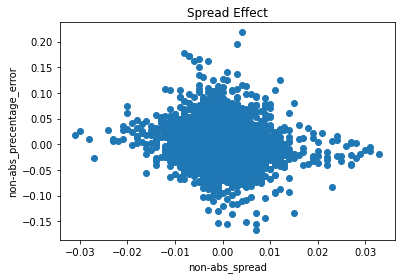

data length 2700


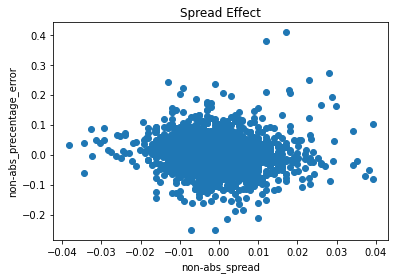

data length 1350


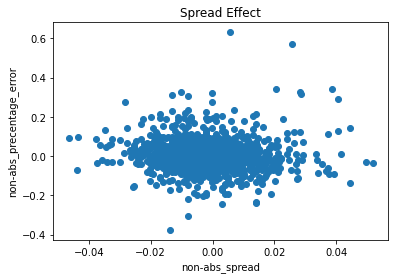

data length 1414


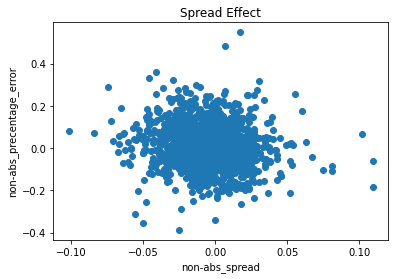

        corr
1M -0.173406
3M -0.092147
6M -0.049486
1Y -0.129061
IRP Result-non_abs
data length 377


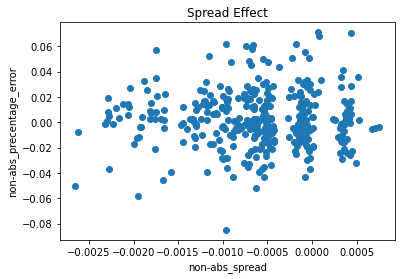

data length 1264


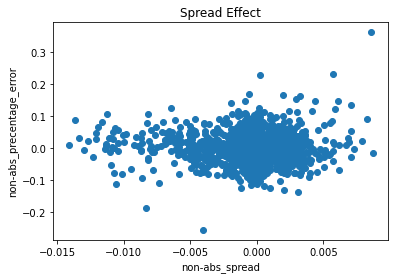

data length 523


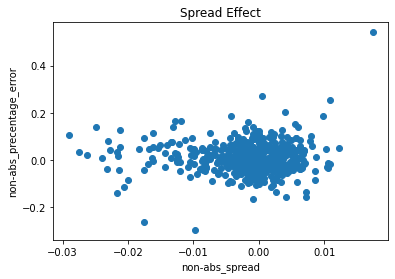

data length 419


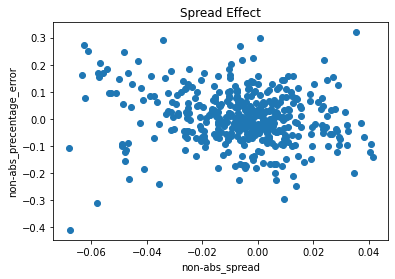

        corr
1M  0.038454
3M -0.005779
6M  0.004199
1Y -0.163884


In [53]:
sample_size = 1
#non absolute value 
print('PPP Result-non_abs')
PPP_corr = aggregated_spread_effects_error_pct_pt(PPP_Folder, 'non-abs', sample_size)
print(PPP_corr)

print('IRP Result-non_abs')
IRP_corr = aggregated_spread_effects_error_pct_pt(IRP_Folder, 'non-abs', sample_size)
print(IRP_corr)

PPP Result-abs
data length 8079


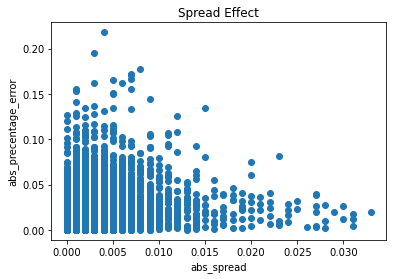

data length 2700


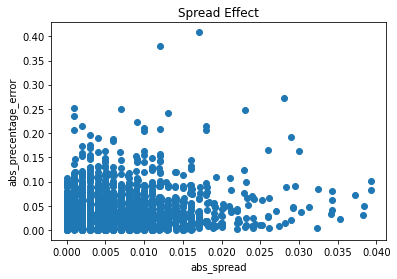

data length 1350


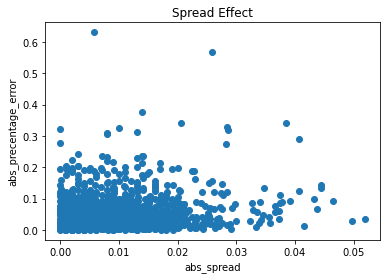

data length 1414


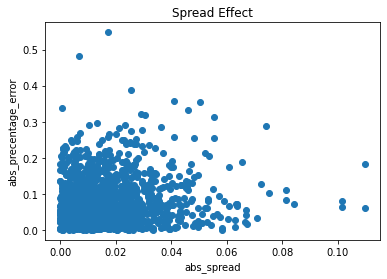

        corr
1M  0.085997
3M  0.105540
6M  0.135553
1Y  0.078584
IRP Result-abs
data length 377


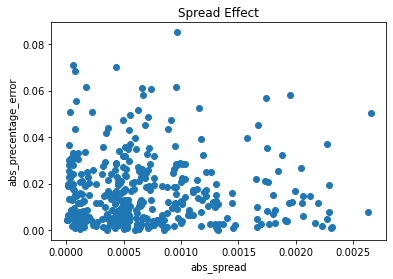

data length 1264


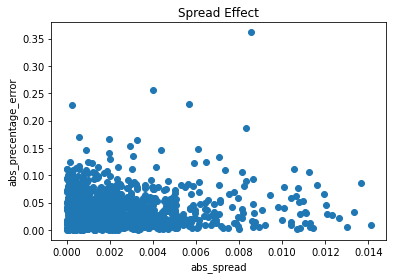

data length 523


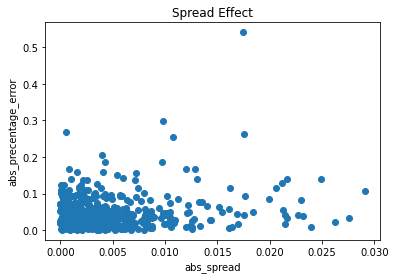

data length 419


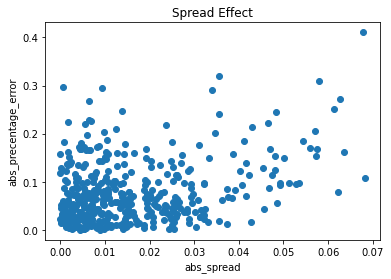

        corr
1M -0.027314
3M  0.069680
6M  0.151238
1Y  0.323683


In [54]:
#absolute value 
print('PPP Result-abs')
PPP_corr = aggregated_spread_effects_error_pct_pt(PPP_Folder, 'abs', sample_size)
print(PPP_corr)

print('IRP Result-abs')
IRP_corr = aggregated_spread_effects_error_pct_pt(IRP_Folder, 'abs', sample_size)
print(IRP_corr)

## (3.2) Aggregated : Error Pct mean (or Abs) plot and correlation 

PPP Result-non_abs
data length 21


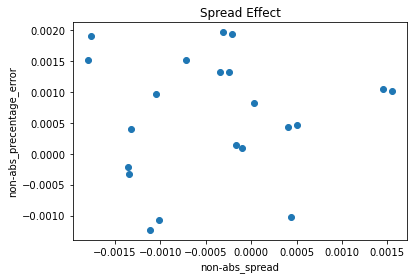

data length 21


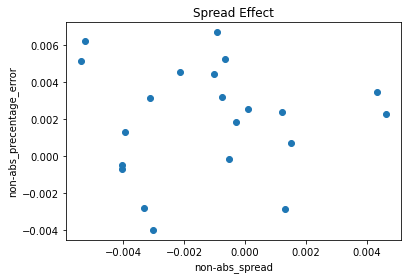

data length 21


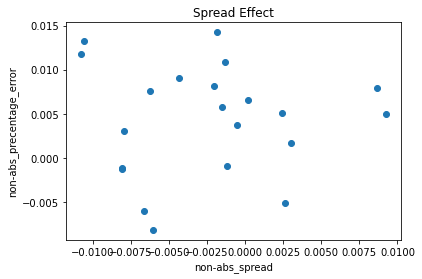

data length 45


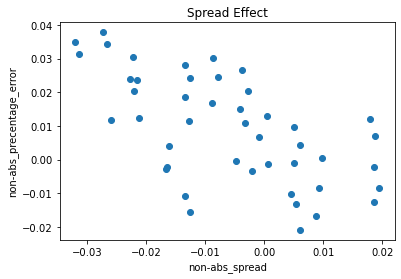

        corr
1M  0.053834
3M  0.007493
6M  0.007089
1Y -0.626801
IRP Result-non_abs
data length 6


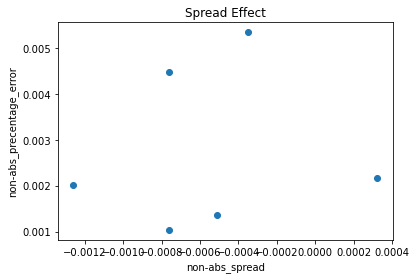

data length 28


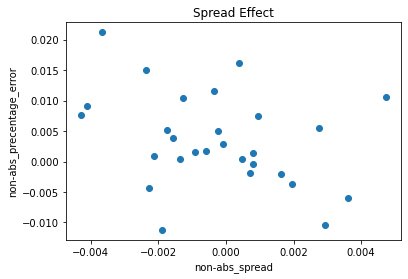

data length 21


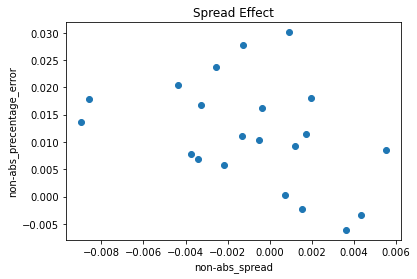

data length 45


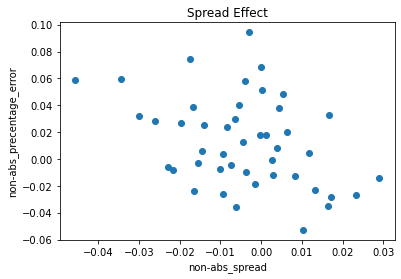

        corr
1M  0.101629
3M -0.324546
6M -0.389076
1Y -0.378848


In [32]:
#non absolute value 
print('PPP Result-non_abs')
PPP_corr = aggregated_spread_effects_error_pct_mean(PPP_Folder, 'non-abs')
print(PPP_corr)

print('IRP Result-non_abs')
IRP_corr = aggregated_spread_effects_error_pct_mean(IRP_Folder, 'non-abs')
print(IRP_corr)

PPP Result-abs
data length 21


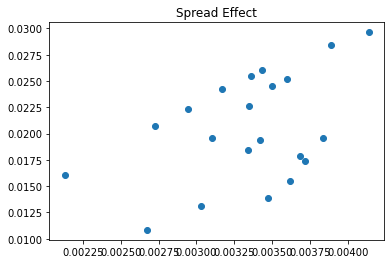

data length 21


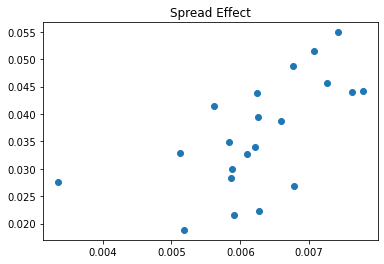

data length 21


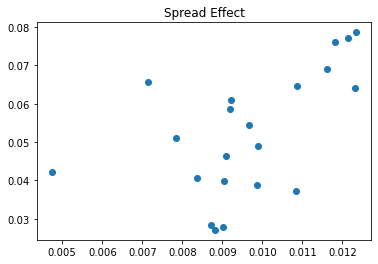

data length 45


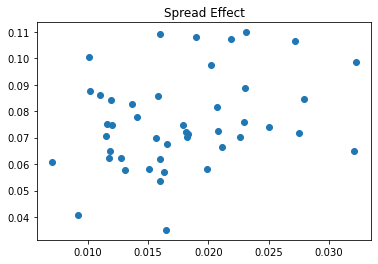

        corr
1M  0.468467
3M  0.619661
6M  0.548083
1Y  0.296233
IRP Result-abs
data length 6


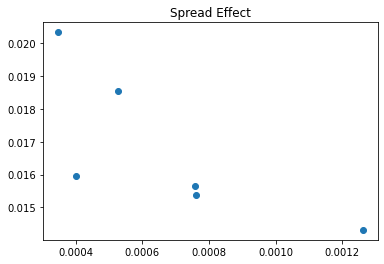

data length 28


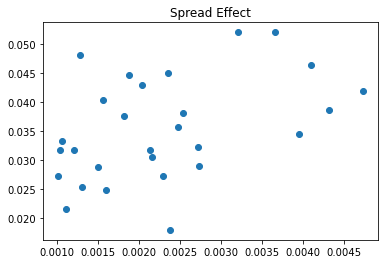

data length 21


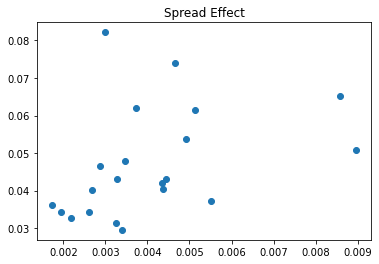

data length 45


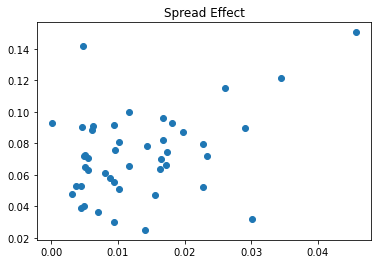

        corr
1M -0.753221
3M  0.436928
6M  0.382988
1Y  0.380286


In [32]:
#absolute value 
print('PPP Result-abs')
PPP_corr = aggregated_spread_effects_error_pct_mean(PPP_Folder, 'abs')
print(PPP_corr)

print('IRP Result-abs')
IRP_corr = aggregated_spread_effects_error_pct_mean(IRP_Folder, 'abs')
print(IRP_corr)

PPP Result-non_abs
data length 1615


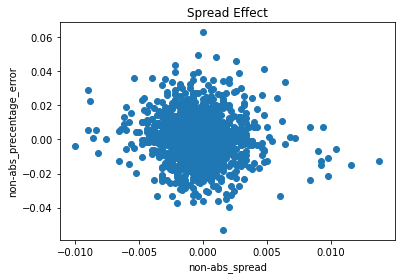

data length 532


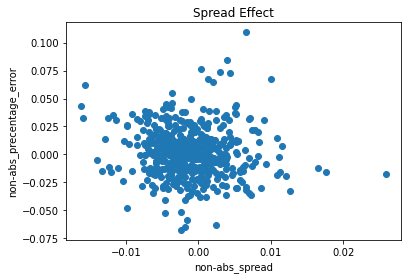

data length 265


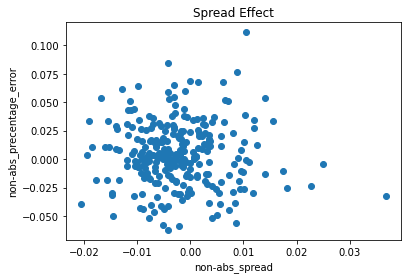

data length 264


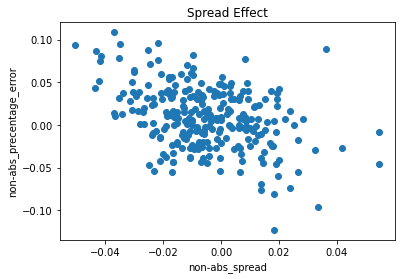

        corr
1M -0.087244
3M -0.084834
6M -0.028291
1Y -0.398409
IRP Result-non_abs
data length 72


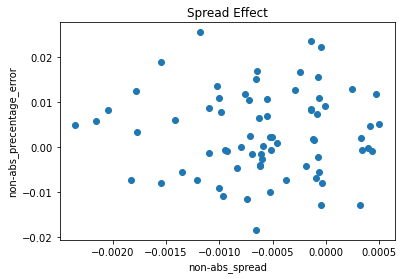

data length 242


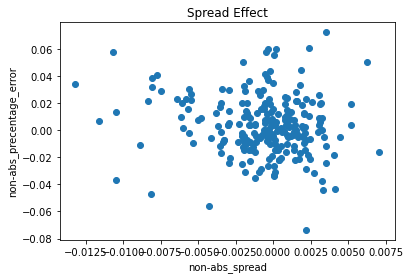

data length 97


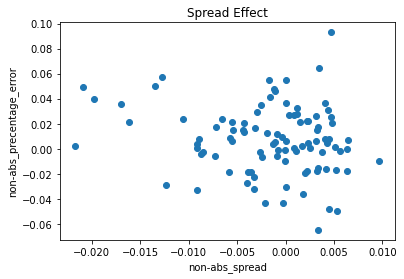

data length 66


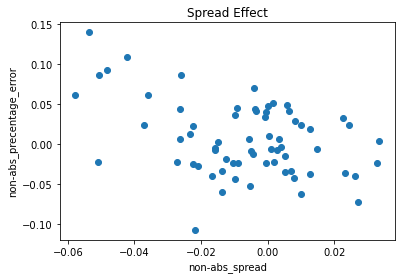

        corr
1M -0.014342
3M -0.128301
6M -0.176344
1Y -0.410769


In [55]:
sample_size = 5
#non absolute value 
print('PPP Result-non_abs')
PPP_corr = aggregated_spread_effects_error_pct_pt(PPP_Folder, 'non-abs', sample_size)
print(PPP_corr)

print('IRP Result-non_abs')
IRP_corr = aggregated_spread_effects_error_pct_pt(IRP_Folder, 'non-abs', sample_size)
print(IRP_corr)

PPP Result-abs
data length 1615


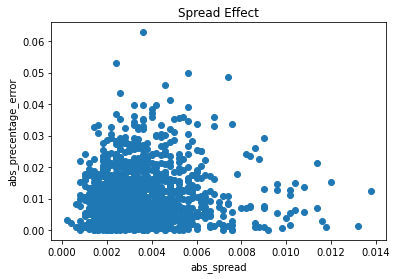

data length 532


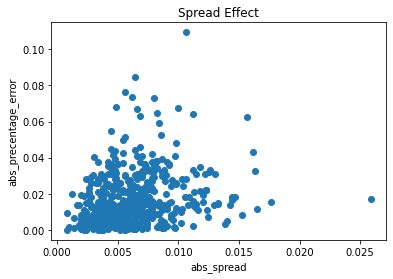

data length 265


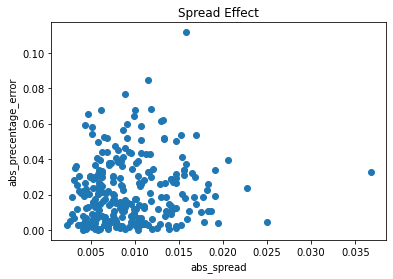

data length 264


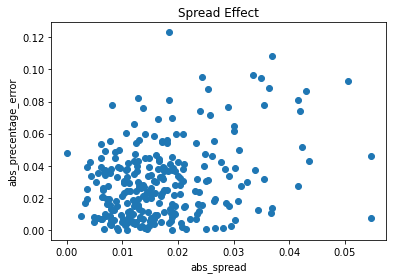

        corr
1M  0.094460
3M  0.240771
6M  0.103489
1Y  0.319843
IRP Result-abs
data length 72


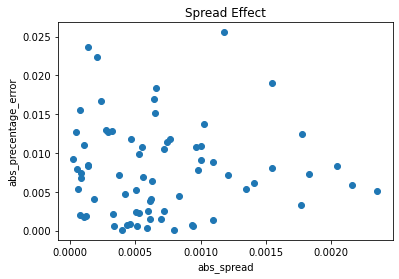

data length 242


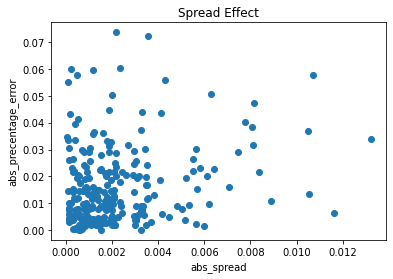

data length 97


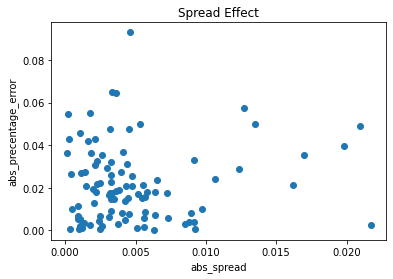

data length 66


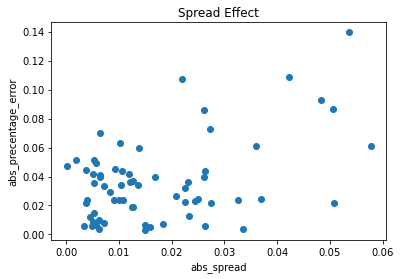

        corr
1M -0.008166
3M  0.202878
6M  0.083379
1Y  0.452518


In [56]:
#absolute value 
print('PPP Result-abs')
PPP_corr = aggregated_spread_effects_error_pct_pt(PPP_Folder, 'abs', sample_size)
print(PPP_corr)

print('IRP Result-abs')
IRP_corr = aggregated_spread_effects_error_pct_pt(IRP_Folder, 'abs', sample_size)
print(IRP_corr)

## (3.3) By country : Error Pct Point (or Abs) top/bottom 5 correlation 

In [35]:
if not os.path.exists(PPP_Folder + '/Data Analysis/Spread Effect/By Country'):
    os.mkdir(PPP_Folder + '/Data Analysis/Spread Effect/By Country')
    
if not os.path.exists(IRP_Folder + '/Data Analysis/Spread Effect/By Country'):
    os.mkdir(IRP_Folder + '/Data Analysis/Spread Effect/By Country')

In [36]:
sample_size = 5

PPP_by_country_error_pct_pt_non_abs = by_country_spread_effects_error_pct_pt(PPP_Folder, 'non-abs', sample_size)
PPP_by_country_error_pct_pt_abs = by_country_spread_effects_error_pct_pt(PPP_Folder, 'abs', sample_size)
IRP_by_country_error_pct_pt_non_abs = by_country_spread_effects_error_pct_pt(IRP_Folder, 'non-abs', sample_size)
IRP_by_country_error_pct_pt_abs = by_country_spread_effects_error_pct_pt(IRP_Folder, 'abs', sample_size)

In [37]:
for data_folder in [PPP_Folder, IRP_Folder]:
    
    top_non_abs_df, bottom_non_abs_df, top_abs_df, bottom_abs_df = sort_country_by_spread_effects_on_error_pct(data_folder)
    
    print(data_folder[-3:])
    print('non_abs : highest corr')
    print(top_non_abs_df)
    print('non_abs : lowest corr')
    print(bottom_non_abs_df)
    
    print('abs : highest corr')
    print(top_abs_df)
    print('abs : lowest corr')
    print(bottom_abs_df)

PPP
non_abs : highest corr
  1Mcurr_pair    1Mcorr 3Mcurr_pair    3Mcorr 6Mcurr_pair    6Mcorr  \
0      USDNOK  0.218361      USDNOK  0.323498      USDNOK  0.563874   
1      USDEUR  0.071710      NOKCHF  0.052765      JPYCHF  0.237772   
2      USDCHF  0.028124      USDGBP  0.049456      GBPJPY  0.235176   
3      NOKCHF -0.018965      JPYCHF  0.045378      JPYSEK  0.176148   
4      SEKCHF -0.026821      GBPEUR  0.033952      NOKCHF  0.087684   

  1Ycurr_pair    1Ycorr  
0      SEKCHF  0.935653  
1      AUDNZD  0.805792  
2      EURCHF  0.674477  
3      USDNOK  0.526299  
4      JPYSEK  0.410382  
non_abs : lowest corr
  1Mcurr_pair    1Mcorr 3Mcurr_pair    3Mcorr 6Mcurr_pair    6Mcorr  \
0      EURJPY -0.308791      EURSEK -0.358948      EURSEK -0.363626   
1      NOKSEK -0.225729      USDJPY -0.351554      NOKSEK -0.355421   
2      EURSEK -0.220462      EURJPY -0.345567      EURJPY -0.264474   
3      GBPSEK -0.207638      GBPCHF -0.258178      EURNOK -0.244160   
4      USDJPY

# (4) Error Pct Autocorrelation

In [114]:
#Defining a function to study the error pct autocorrelation

def monthly_error_pct_autocorr(data_folder):
    
    by_country_error_pct_autocorr = pd.DataFrame()
    by_country_error_pct_autocorr.index = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'max_correlated_period']
    
    for curr_pair in possible_curr_pairs:
        
        data_path = data_folder + '/' + curr_pair + '/Data Details' + '/' + '1M' + '.csv'
        
        if not os.path.exists(data_path):
                continue
                
        df = pd.read_csv(data_path)
        
        res = tsa.stattools.acf(df['spot_error_pct'], qstat = True)
        
        qstat = res[2]
        
        # searching the time lag that shows largest drop in autocorrelation
        
        smallest_qstat = 10000
        target_lag = -1
        
        for i in range(12):
            
            if qstat[i] < smallest_qstat : 
                smallest_qstat = qstat[i]
                target_lag = i + 1 if smallest_qstat < 0.05 else -1
        
        print(curr_pair)
        statsmodels.graphics.tsaplots.plot_acf(df['spot_error_pct'])
        plt.savefig(data_folder+ '/Data Analysis/Error Autocorrelation/'+curr_pair+'_acf_plot'+'.png')
        plt.show()
        
        data_ls = []
        
        for i in range(6):
            data_ls.append(qstat[i])
            
        data_ls.append(target_lag)
        
        by_country_error_pct_autocorr[curr_pair] = data_ls
        
    by_country_error_pct_autocorr = by_country_error_pct_autocorr.T
    
    by_country_error_pct_autocorr.to_csv(data_folder+ '/Data Analysis/Error Autocorrelation/by_country_autocorr.csv')
    
    return by_country_error_pct_autocorr

In [107]:
# Defining a function to sort out those countries with largest/smallest error pct autocorr

def sort_country_by_error_pct_autocorr(data_folder):
    
    top_df = pd.DataFrame()
    bottom_df = pd.DataFrame()
    
    df = pd.read_csv(data_folder + '/Data Analysis/Error Autocorrelation/by_country_autocorr.csv', index_col = 0)
        
    #Finding Top/Bottom 5 pairs 
        
    top_pair = df['max_correlated_period'].dropna().sort_values(ascending = False).head().index
    
    top_df = pd.DataFrame(df.loc[top_pair].values)
    top_df.columns = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'max_correlated_period']
    top_df.index = top_pair
    
    bottom_pair = df['max_correlated_period'].dropna().sort_values(ascending = False).tail().index
    
    bottom_df = pd.DataFrame(df.loc[bottom_pair].values)
    bottom_df.columns = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'max_correlated_period']
    
    bottom_df.index = bottom_pair
    
    top_df.to_csv(data_folder + '/Data Analysis/Error Autocorrelation/highest_corr_by_countries.csv')
    bottom_df.to_csv(data_folder + '/Data Analysis/Error Autocorrelation/lowest_corr_by_countries.csv')

    return top_df, bottom_df

In [102]:
if not os.path.exists(PPP_Folder + '/Data Analysis/Error Autocorrelation'):
    os.mkdir(PPP_Folder + '/Data Analysis/Error Autocorrelation')
    
if not os.path.exists(IRP_Folder + '/Data Analysis/Error Autocorrelation'):
    os.mkdir(IRP_Folder + '/Data Analysis/Error Autocorrelation')

PPP Result
USDEUR


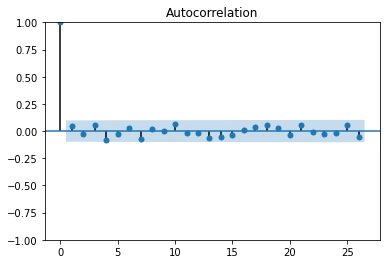

USDGBP


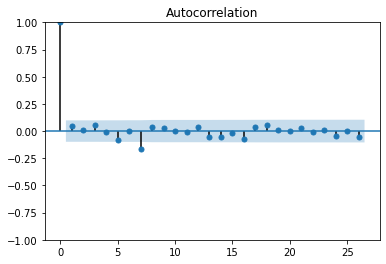

USDJPY


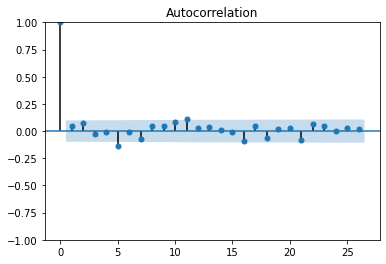

USDCHF


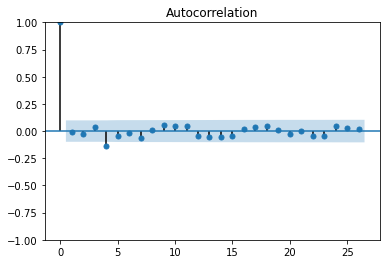

USDNOK


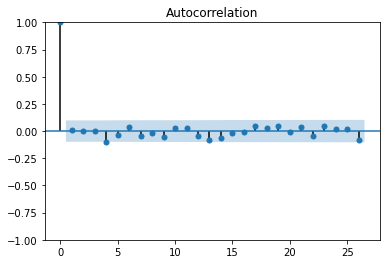

USDSEK


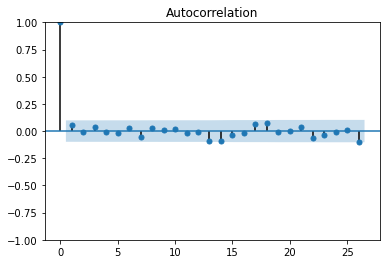

GBPEUR


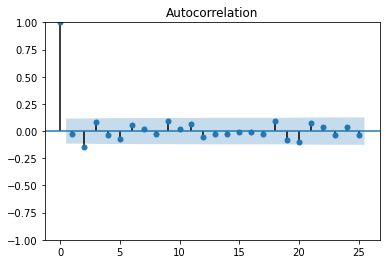

EURJPY


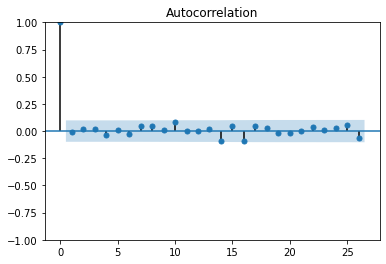

EURCHF


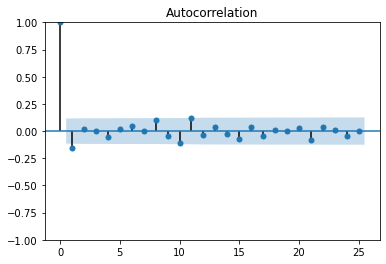

EURNOK


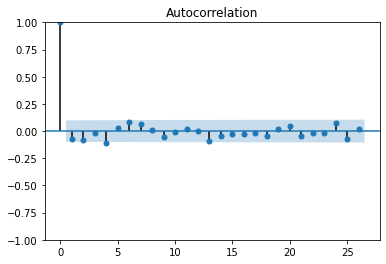

EURSEK


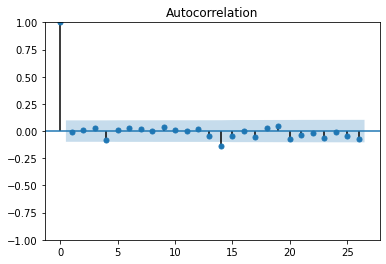

GBPJPY


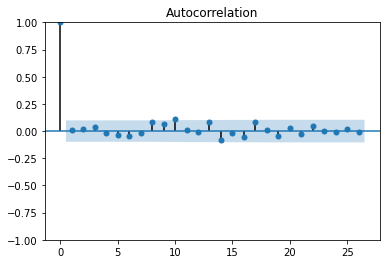

GBPCHF


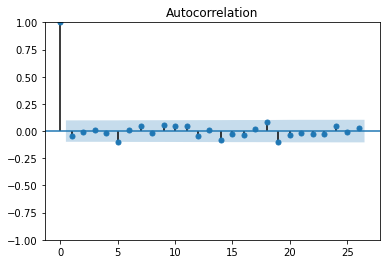

GBPNOK


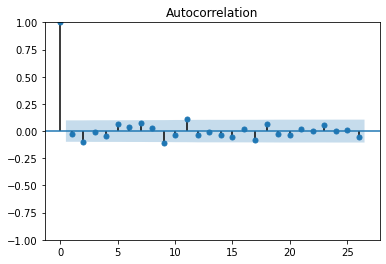

GBPSEK


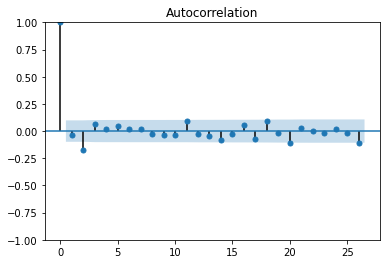

JPYCHF


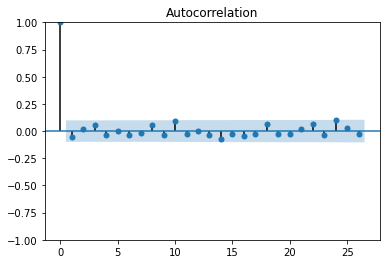

JPYNOK


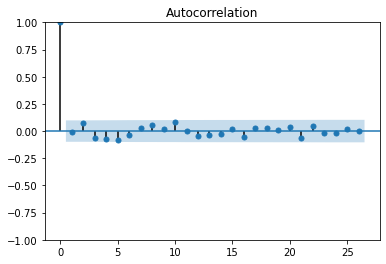

JPYSEK


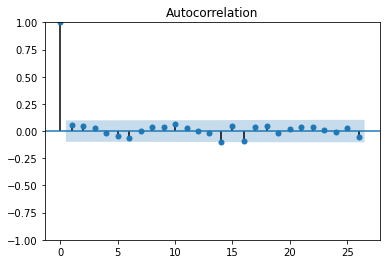

NOKCHF


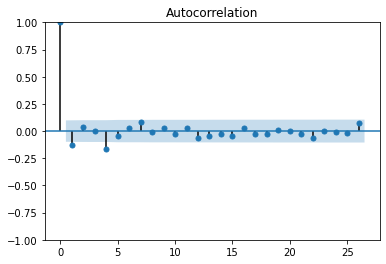

SEKCHF


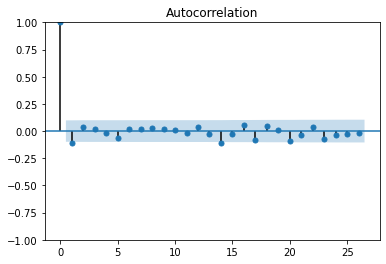

NOKSEK


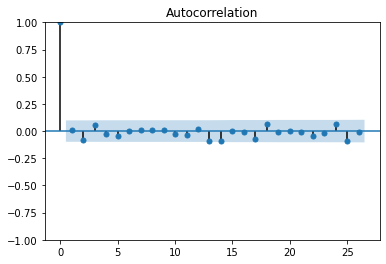

IRP Result
USDEUR


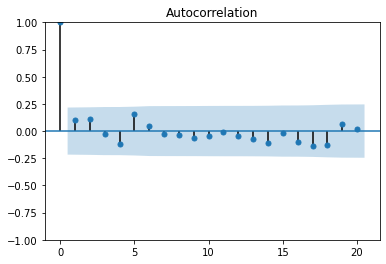

USDGBP


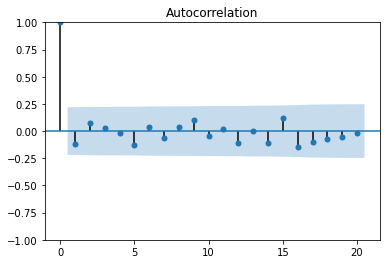

USDJPY


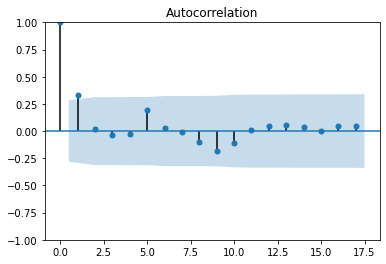

GBPEUR


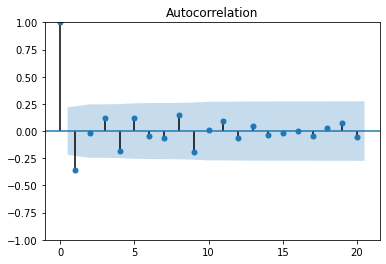

EURJPY


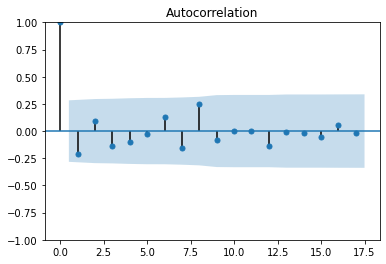

GBPJPY


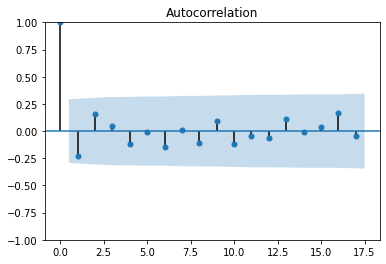

In [115]:
print('PPP Result')
PPP_corr = monthly_error_pct_autocorr(PPP_Folder)


print('IRP Result')
IRP_corr = monthly_error_pct_autocorr(IRP_Folder)


In [108]:
for data_folder in [PPP_Folder, IRP_Folder]:
    
    top_df, bottom_df = sort_country_by_error_pct_autocorr(data_folder)
    
    print(data_folder[-3:])
    print('highest corr')
    print(top_df)
    print('lowest corr')
    print(bottom_df)

PPP
highest corr
           lag_1     lag_2     lag_3     lag_4     lag_5     lag_6  \
GBPNOK  0.583661  0.099805  0.201373  0.237767  0.219898  0.267229   
USDJPY  0.372882  0.234745  0.364499  0.517375  0.053625  0.090107   
EURNOK  0.129112  0.081410  0.158904  0.047040  0.075581  0.045837   
USDGBP  0.399433  0.694359  0.592011  0.749048  0.470539  0.599971   
NOKCHF  0.011941  0.030906  0.073203  0.001656  0.002716  0.005202   

        max_correlated_period  
GBPNOK                   11.0  
USDJPY                   11.0  
EURNOK                    7.0  
USDGBP                    7.0  
NOKCHF                    4.0  
lowest corr
           lag_1     lag_2     lag_3     lag_4     lag_5     lag_6  \
EURJPY  0.818067  0.921526  0.968412  0.949110  0.977955  0.980174   
USDSEK  0.246978  0.509028  0.580443  0.739830  0.842007  0.885849   
USDNOK  0.888556  0.987714  0.998635  0.370779  0.425282  0.479346   
USDCHF  0.919836  0.844613  0.815157  0.085735  0.111089  0.169233   
NOKSEK  

# (5) Expected Return vs Realized Return

In [38]:
if not os.path.exists(PPP_Folder + '/Data Analysis/Return Insight'):
    os.mkdir(PPP_Folder + '/Data Analysis/Return Insight')
    
if not os.path.exists(IRP_Folder + '/Data Analysis/Return Insight'):
    os.mkdir(IRP_Folder + '/Data Analysis/Return Insight')

In [39]:
#Defining function to study correlation between realized return and expected return (aggregated sense)

def aggregated_return_insight(data_folder, sample_size):
    
    corr_ls = []
    
    for maturity in Maturity:
        
        expected_return_ls = []
        realized_return_ls = []
        
        for curr_pair in possible_curr_pairs:
            data_path = data_folder + '/' + curr_pair + '/Data Details' + '/' + maturity + '.csv'
            
            if not os.path.exists(data_path):
                continue
            df = pd.read_csv(data_path)
            
            if sum(df['spot_error_pct'].isna()) >0 :
                print(curr_pair)
                
            for i in range(sample_size, len(df), sample_size):
                expected_return_ls.append(np.mean(df['expected_ret'][i - sample_size : i]))
                realized_return_ls.append(np.mean(df['realized_ret'][i - sample_size : i]))           
                
            
        print('data length', len(expected_return_ls))
        plt.scatter(expected_return_ls, realized_return_ls)
        plt.title('Return Insight_' + maturity)
        plt.savefig(data_folder + '/Data Analysis/Return Insight/' + 'aggregated_return_insight_' + maturity +'.png')
        plt.show()
        corr_ls.append(np.corrcoef(expected_return_ls, realized_return_ls)[1,0])
        
    corr_df = pd.DataFrame()
    corr_df['corr'] = corr_ls
    corr_df.index = Maturity
    
    corr_df.to_csv(data_folder + '/Data Analysis/Return Insight/' + 'aggregated_return_insight_'+maturity + '.csv')
    
    return corr_df

In [40]:
#Defining function to study correlation between mean realized return and mean expected return (aggregated sense)

def aggregated_mean_return_insight(data_folder):
    
    corr_ls = []
    
    for maturity in Maturity:
        
        expected_return_ls = []
        realized_return_ls = []
        
        for curr_pair in possible_curr_pairs:
            data_path = data_folder + '/' + curr_pair + '/Data Details' + '/' + maturity + '.csv'
            
            if not os.path.exists(data_path):
                continue
            df = pd.read_csv(data_path)
            
            if sum(df['spot_error_pct'].isna()) >0 :
                print(curr_pair)
                
            if len(df) == 0:
                continue
                
            expected_return_ls.append(np.mean(df['expected_ret']))
            realized_return_ls.append(np.mean(df['realized_ret']))        
                
            
        print('data length', len(expected_return_ls))
        plt.scatter(expected_return_ls, realized_return_ls)
        plt.title('Return Insight_' + maturity)
        plt.savefig(data_folder + '/Data Analysis/Return Insight/' + 'aggregated_mean_return_insight_' + maturity +'.png')
        plt.show()
        corr_ls.append(np.corrcoef(expected_return_ls, realized_return_ls)[1,0])
        
    corr_df = pd.DataFrame()
    corr_df['corr'] = corr_ls
    corr_df.index = Maturity
    
    corr_df.to_csv(data_folder + '/Data Analysis/Return Insight/' + 'aggregated_mean_return_insight_'+maturity + '.csv')
    
    return corr_df

In [41]:
# Defining a function to study correlation between realized return and expected return country by country

def by_country_return_insight(data_folder):
    
    result_df = pd.DataFrame()
    result_df.index = Maturity
    
    for curr_pair in possible_curr_pairs:
        
        correlation_ls = []
        
        curr_pair_folder = data_folder + '/' + curr_pair + '/Data Details'
        
        for maturity in Maturity:
            
            realized_ret_ls = []
            expected_ret_ls = []
            
            try:
                df = pd.read_csv(curr_pair_folder + '/' + maturity + '.csv')
            except:
                correlation_ls.append(np.nan)
                continue
                
            if len(df) < 5:
                correlation_ls.append(np.nan)
                continue
                
            realized_ret_ls = df['realized_ret'].values
            expected_ret_ls = df['expected_ret'].values 
                
            correlation_ls.append(np.corrcoef(expected_ret_ls, realized_ret_ls)[1,0])
            
        result_df[curr_pair] = correlation_ls
    
    result_df = result_df.T
    
    result_df.to_csv(data_folder + '/Data Analysis/Return Insight/By Country/by_country_return_insight.csv')
    return result_df

In [42]:
# Defining a function to sort out those countries with largest/smallest time effects on error pct

def sort_country_by_return_insight(data_folder):
    
    top_df = pd.DataFrame()
    bottom_df = pd.DataFrame()
    
    agg_df = pd.read_csv(data_folder + '/Data Analysis/Return Insight/By Country/by_country_return_insight.csv', index_col = 0)

    for maturity in Maturity:
        
        df = pd.DataFrame()
        df['corr'] = agg_df[maturity]
        df.index = agg_df.index
        
        
        #Finding Top/Bottom 5 pairs in turns of non-abs spread correlation
        
        top_pair = df['corr'].dropna().sort_values(ascending = False).head().index
        
        top_df[maturity + 'curr_pair'] = top_pair
        top_df[maturity +'corr'] = df.loc[top_pair]['corr'].values
    
        bottom_pair = df['corr'].dropna().sort_values(ascending = True).head().index
        
        bottom_df[maturity +'curr_pair'] = bottom_pair
        bottom_df[maturity +'corr'] = df.loc[bottom_pair]['corr'].values
    
    top_df.to_csv(data_folder + '/Data Analysis/Return Insight/By Country/highest_corr_by_countries.csv')
    bottom_df.to_csv(data_folder + '/Data Analysis/Return Insight/By Country/lowest_corr_by_countries.csv')
    
    return top_df, bottom_df

## (5.1) Aggregated : (Data Point) plot and correlation 

PPP Result
data length 8100


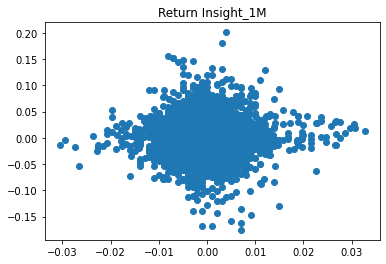

data length 2721


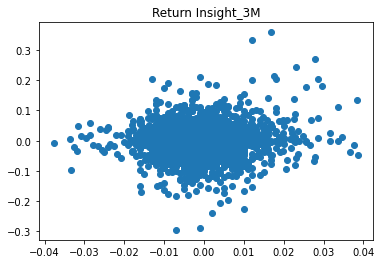

data length 1371


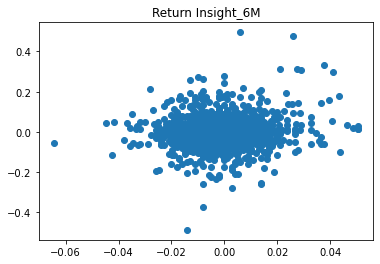

data length 1459


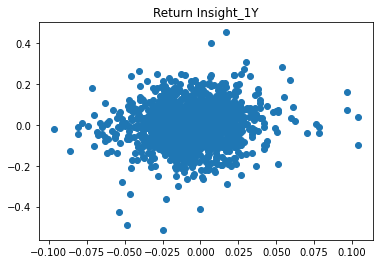

        corr
1M -0.009939
3M  0.062298
6M  0.103038
1Y  0.091049
IRP Result
data length 383


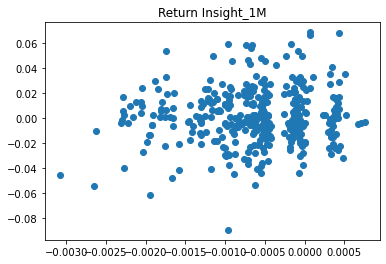

data length 1292


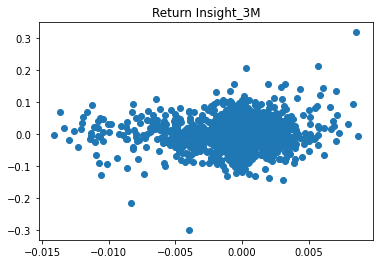

data length 544


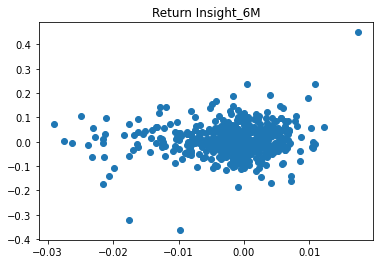

data length 464


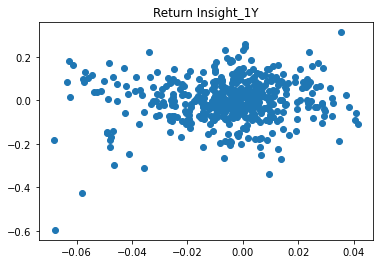

        corr
1M  0.101168
3M  0.067148
6M  0.089144
1Y  0.074982


In [57]:
print('PPP Result')
PPP_corr = aggregated_return_insight(PPP_Folder,1)
print(PPP_corr)

print('IRP Result')
IRP_corr = aggregated_return_insight(IRP_Folder,1)
print(IRP_corr)

## (5.2) Aggregated : (Data Point Average) plot and correlation 

PPP Result
data length 21


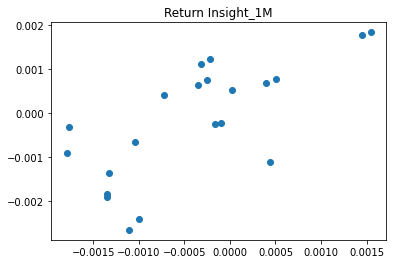

data length 21


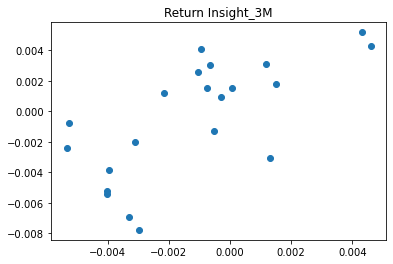

data length 21


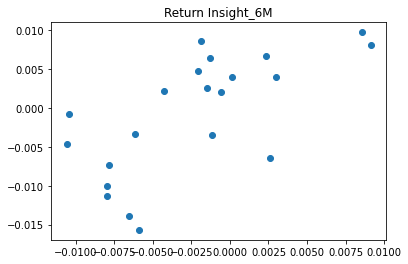

data length 45


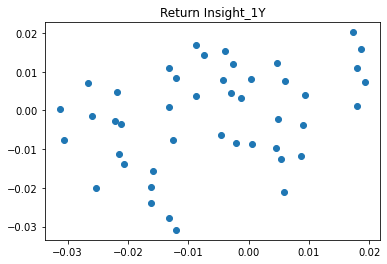

        corr
1M  0.714079
3M  0.691641
6M  0.669363
1Y  0.333401
IRP Result
data length 6


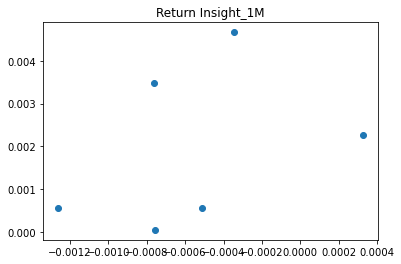

data length 28


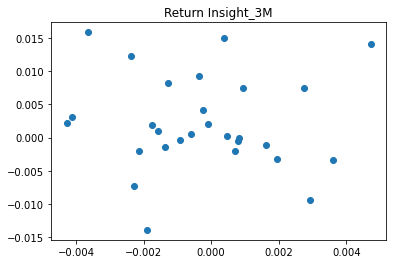

data length 21


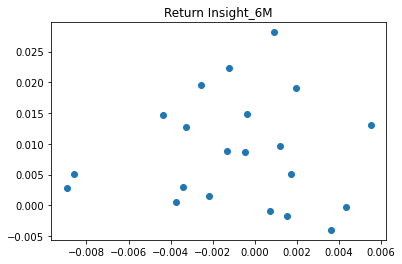

data length 45


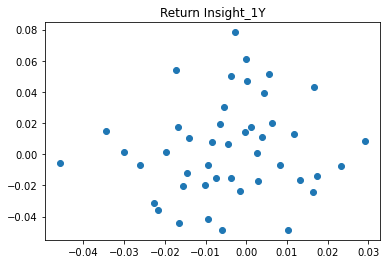

        corr
1M  0.373219
3M -0.035007
6M  0.018260
1Y  0.116021


In [60]:
print('PPP Result')
PPP_corr = aggregated_mean_return_insight(PPP_Folder)
print(PPP_corr)

print('IRP Result')
IRP_corr = aggregated_mean_return_insight(IRP_Folder)
print(IRP_corr)

PPP Result
data length 1615


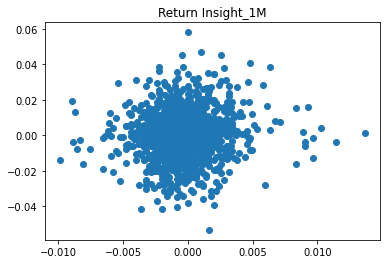

data length 532


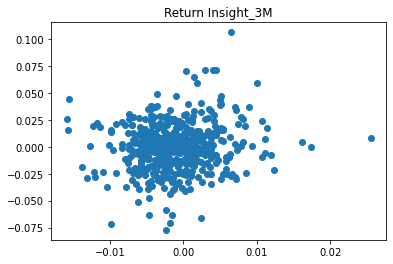

data length 265


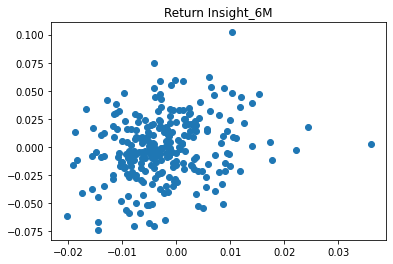

data length 264


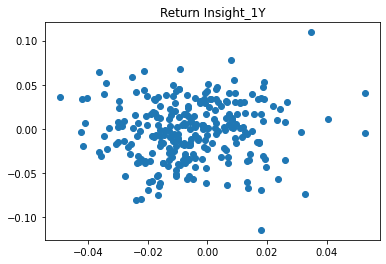

        corr
1M  0.084493
3M  0.123966
6M  0.231573
1Y  0.067949
IRP Result
data length 72


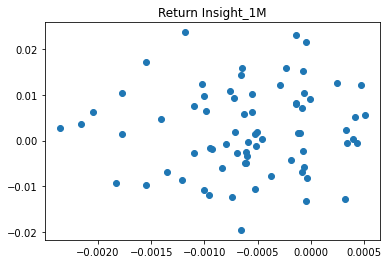

data length 242


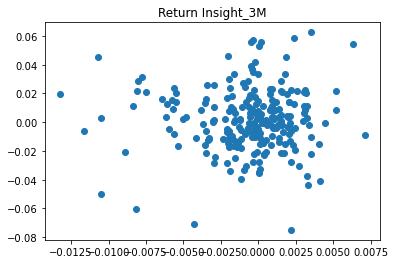

data length 97


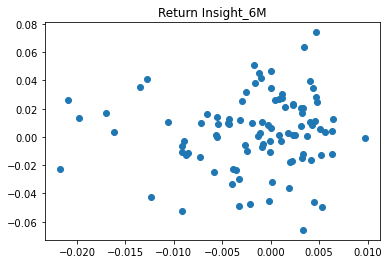

data length 66


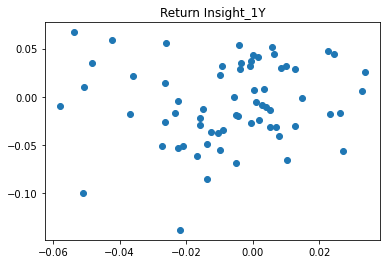

        corr
1M  0.053658
3M  0.014270
6M  0.059515
1Y  0.096493


In [75]:
 print('PPP Result')
PPP_corr = aggregated_return_insight(PPP_Folder,5)
print(PPP_corr)

print('IRP Result')
IRP_corr = aggregated_return_insight(IRP_Folder,5)
print(IRP_corr)

## (5.3) By Country : (Data Point) Top/Bottom 5

In [43]:
if not os.path.exists(PPP_Folder + '/Data Analysis/Return Insight/By Country'):
    os.mkdir(PPP_Folder + '/Data Analysis/Return Insight/By Country')
    
if not os.path.exists(IRP_Folder + '/Data Analysis/Return Insight/By Country'):
    os.mkdir(IRP_Folder + '/Data Analysis/Return Insight/By Country')

In [44]:
PPP_by_country_error_pct_pt_non_abs = by_country_return_insight(PPP_Folder)
    
IRP_by_country_error_pct_pt_non_abs = by_country_return_insight(IRP_Folder)
    

In [45]:
for data_folder in [PPP_Folder, IRP_Folder]:
    
    top_df, bottom_df = sort_country_by_return_insight(data_folder)
    
    print(data_folder[-3:])
    print('highest corr')
    print(top_df)
    print('lowest corr')
    print(bottom_df)
    

PPP
highest corr
  1Mcurr_pair    1Mcorr 3Mcurr_pair    3Mcorr 6Mcurr_pair    6Mcorr  \
0      USDNOK  0.116703      USDGBP  0.262421      USDGBP  0.294142   
1      USDGBP  0.108820      USDNOK  0.193034      EURSEK  0.287288   
2      USDCHF  0.044008      USDEUR  0.179011      USDNOK  0.279948   
3      GBPCHF  0.039036      USDCHF  0.147174      USDSEK  0.278637   
4      NOKCHF  0.034262      NOKCHF  0.146884      USDEUR  0.263540   

  1Ycurr_pair    1Ycorr  
0      USDNOK  0.420922  
1      EURNZD  0.378606  
2      EURAUD  0.353902  
3      AUDCHF  0.332951  
4      NZDCHF  0.307649  
lowest corr
  1Mcurr_pair    1Mcorr 3Mcurr_pair    3Mcorr 6Mcurr_pair    6Mcorr  \
0      EURJPY -0.139597      EURJPY -0.153788      USDJPY -0.175191   
1      SEKCHF -0.102034      EURCHF -0.116993      GBPNOK -0.128055   
2      GBPSEK -0.100700      USDJPY -0.116418      EURJPY -0.127502   
3      USDJPY -0.084999      GBPEUR -0.078254      GBPSEK -0.042634   
4      EURCHF -0.077587      JPYN